In [141]:
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt

In [142]:
data = pd.read_excel('C:/Users/jcoliveira/Desktop/TCC/Projeto/DataBase.xlsx')

In [143]:
y = data.Resultado
x = data.drop(columns = ['Resultado'])

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24878, 22), (10662, 22), (24878,), (10662,))

In [145]:
classify_xgb_fundo = xgb.XGBClassifier(
    max_depth=20,                # Profundidade máxima das árvores
    n_estimators=50,            # Número de árvores
    learning_rate=0.3,           # Taxa de aprendizado
    subsample=1.0,               # Proporção de amostras usadas por árvore
    colsample_bytree=1.0,        # Proporção de features usadas por árvore
    gamma= 0,                    # Valor mínimo de ganho para uma divisão
    min_child_weight=5,          # Peso mínimo das instâncias em um nó filho
    scale_pos_weight=2,          # Para balancear classes em dados desbalanceados
    objective='binary:logistic', # Função de perda para classificação binária
    eval_metric=['auc','error','logloss']            # Métrica de avaliação durante o treinamento 'logloss', 'auc',
#    eval_metric='logloss'            # Métrica de avaliação durante o treinamento 'logloss', 'auc',
)
# Monitorar o processo de treinamento com o eval_set
eval_set = [(x_train, y_train), (x_test, y_test)]

In [146]:
# max_depth = 6                 - Define a profundidade máxima das árvores de decisão.
# n_estimators = 100            - Número de árvores a serem construídas (também conhecido como número de iterações ou rounds).
# learning_rate = 0.3           - Também conhecido como "eta", controla o tamanho dos passos que o modelo dá ao ajustar os pesos após cada árvore.
# subsample = 1.0               - Proporção de amostras usadas para treinar cada árvore.
# colsample_bytree = 1.0        - Proporção de recursos (features) a serem amostrados por árvore.
# gamma = 0                     - Valor mínimo de perda de divisão (gain) necessário para realizar uma nova divisão em uma árvore.
# min_child_weight = 1          - Peso mínimo de instâncias em um nó filho.
# scale_pos_weight = 1          - Balanceia o número de instâncias da classe positiva e negativa.
# objective = "binary:logistic" - Para um problema de classificação binária, use "binary:logistic", para múltiplas classes, "multi:softmax" ou "multi:softprob"
# eval_metric =                 - Pode ser 'error' para taxa de erro, 'logloss' para log-loss, 'auc' para área sob a curva ROC
# booster = 'gbtree'            - Cada árvore é construída sequencialmente, ajustando erros dos modelos anteriores, e as árvores são somadas para fazer previsões finais.
# booster = 'gblinear'          - Ele ajusta um modelo de regressão linear (para problemas de regressão) ou regressão logística (para classificação).
# booster = 'dart'              - Melhora a generalização do modelo, evitando o overfitting ao reduzir a dependência excessiva de algumas árvores.


In [147]:
# Avaliação cruzada
#cross_val_score(classify_xgb_fundo, x_train, y_train).mean() * 100

In [148]:
model = classify_xgb_fundo
model.fit(x_train, y_train, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['auc', 'error', 'logloss'],
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [149]:
predict_resultado = model.predict(x_test)

In [150]:
acuracia = metrics.accuracy_score(y_test, predict_resultado)
print(f"Acurácia: {acuracia * 100:.2f}%\t-\tAC = {acuracia:.3f}") # acuracia = previsões correta / total de amostras

precisao = metrics.precision_score(y_test, predict_resultado, average='binary')  # Para classificação binária
print(f"Precisão: {precisao * 100:.2f}%\t-\tPR = {precisao:.3f}") # precisão = VP / VP + FP

recall = metrics.recall_score(y_test, predict_resultado, average='binary')
print(f"  Recall: {recall * 100:.2f}%\t-\tRC = {recall:.3f}")       # recall = = VP / VP + FN

f1 = metrics.f1_score(y_test, predict_resultado, average='binary')
print(f"F1-Score: {f1 * 100:.2f}%\t-\t F = {f1:.3f}")              # f1 = média harmônica entre a precisão e o recall, equilibrando ambas as métricas

Acurácia: 72.05%	-	AC = 0.721
Precisão: 69.13%	-	PR = 0.691
  Recall: 80.89%	-	RC = 0.809
F1-Score: 74.55%	-	 F = 0.745


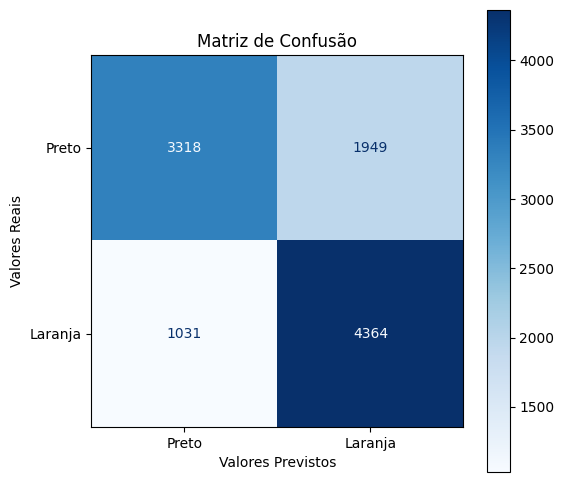

In [151]:
cm = metrics.confusion_matrix(y_test, predict_resultado)
VN, FP, FN, VP = cm.ravel()

# 1º gráfico: Matriz de confusão
plt.figure(figsize=(6, 6))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Preto", "Laranja"])
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

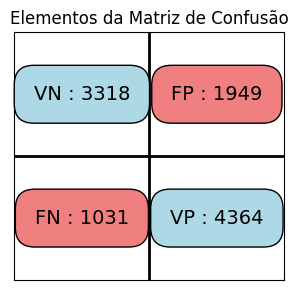

In [152]:
# 2º gráfico: Apresentação de VP, VN, FP, FN em formato de quadrantes
fig, ax = plt.subplots(figsize=(3, 3))
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.text(0.5, 1.5, f'VN : {VN}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=1'))
ax.text(1.5, 1.5, f'FP : {FP}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=1'))
ax.text(0.5, 0.5, f'FN : {FN}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=1'))
ax.text(1.5, 0.5, f'VP : {VP}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=1'))
ax.plot([1, 1], [0, 2], color='black', lw=2)
ax.plot([0, 2], [1, 1], color='black', lw=2)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Elementos da Matriz de Confusão')
plt.tight_layout()
plt.show()

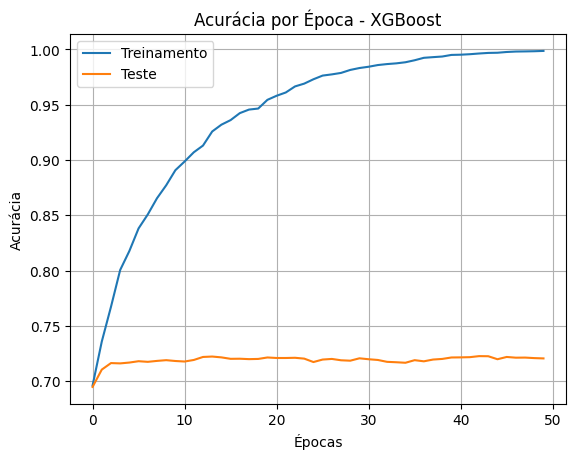

In [153]:
# Visualizar o AUC para treino e teste ao longo das iterações # Plotar o gráfico do AUC
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)
#plt.figure(figsize=(10,6))
train_accuracy = [1 - e for e in results['validation_0']['error']]
test_accuracy = [1 - e for e in results['validation_1']['error']]
plt.plot(x_axis, train_accuracy, label='Treinamento')
plt.plot(x_axis, test_accuracy, label='Teste')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia por Época - XGBoost')
plt.legend()
plt.grid(True)
plt.show()

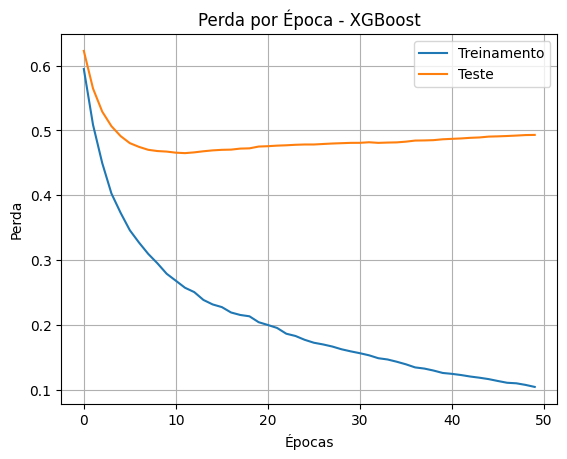

In [154]:
# Plotar o gráfico de erro de treinamento e teste # Visualizar o logloss para treino e teste ao longo das iterações
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
#plt.figure(figsize=(10,6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Treinamento')
plt.plot(x_axis, results['validation_1']['logloss'], label='Teste')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda por Época - XGBoost')
plt.legend()
plt.grid(True)
plt.show()